In [2]:
import numpy
import matplotlib
import matplotlib.pyplot as plt

## Objetivo

Maximizar la siguiente ecuación:

y = ((5+x1-X3)+(-30-X1+X4)+(x2-X1 + 50))


## Codificación

Para este problema el cromosoma estará compuesto por 4 genes cada uno de ellos representará el valor de una X

[X1 X2 X3 X4]

## Adaptación

La función de adaptación será el resultado de la ecuación para la población actual. Ya que se trata de maximizar el resultado a mayor reultado mayor adaptación.

In [3]:
#equation_inputs : valores de entrada
#pop : población
def cal_pop_fitness(population):
    fitness = []
    for pop in population:
        fitness.append( ((5 + pop[0] - pop[2]) + (-30 - pop[0] + pop[3]) + (pop[1] - pop[0] + 50)) )
    return fitness

## Selección

La función de selección buscará dentro de la población cuyo valor de adaptación ya ha sido seleccionado y devolverá los más adaptados.

In [4]:
#pop: población
#fitness: arreglo con los valores de adaptación
#num_parent: cantidad de padres que se quieren obtener
def select_mating_pool(pop, fitness, num_parents):
    #Crear arreglo vacío que contendrá los padres seleccionados
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        #Obtener individuo con mayor adaptación
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        #Obtener índice del individuo
        max_fitness_idx = max_fitness_idx[0][0]
        #Cargar individuo a la lista de padres
        parents[parent_num, :] = pop[max_fitness_idx, :]
        #Setear valor de adaptación a un valor muy malo para que no vuelva a ser elegido
        fitness[max_fitness_idx] = -99999999999
    #Devolver lista de padres
    return parents

## Cruza

La cruza se realizará utilizando el método de un punto.

In [5]:
#parents: lista de padres
#offspring_size: cantidad de hijos que se quieren obtener
def crossover(parents, offspring_size):
    #Generar arreglo vacío donde se guardarán los hijos
    offspring = numpy.empty((offspring_size,parents.shape[1]))
    #Definir punto de cruce en la mitad de los padre
    crossover_point = numpy.uint8(parents.shape[0]/2)
    for k in range(offspring_size):
        # Índice del primer padre para realizar la cruza
        parent1_idx = k%parents.shape[0]
        # Índice del segundo padre para realizar la cruza
        parent2_idx = (k+1)%parents.shape[0]
        # Generar el primer hijo con la primer mitad de un padre y la segunda de otro
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # Generar el segundo hijo con las partes opuestas
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    #Devolver lista de hijos
    return offspring

## Mutación

La función de mutación recorrerá todos los hijos generados y cambiará el valor de uno de sus genes.

In [14]:
#offspring_crossover: lista de hijos a mutar
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        #Generar un valor aleatorio
        random_value = numpy.random.uniform(-500, 500)
        # Sumar el valor aleatorio a uno de los genes
        offspring_crossover[idx, numpy.random.randint(low=0, high=(offspring_crossover.shape[1]-1) )] = offspring_crossover[idx, offspring_crossover.shape[1]-1] + random_value
    #Devolver lista de hijos mutados
    return offspring_crossover

# Algoritmo

In [15]:
#Cantidad de genes
num_genes = 4
#Soluciones por población
sol_per_pop = 10000
#Número de padres para cruza
num_parents_mating = 50
#Tamaño de la población
pop_size = (sol_per_pop,num_genes) 
#Crear pobliación inicial con valores aleatorios
new_population = numpy.random.uniform(low=-10000.0, high=10000.0, size=pop_size)
print("Población incial")
print(new_population)
#Cantidad de generaciones a realizar
num_generations = 100

Población incial
[[-9772.59152463 -9734.49230376 -5309.37791644   157.160596  ]
 [  932.60480786   673.5331968   9629.55350319  7225.70364924]
 [ 6184.39947212  6126.3234652  -6738.62657512  4122.54144825]
 ...
 [ 8559.86106255  3067.68542854  -937.05632809 -6664.20078873]
 [ 2447.37998573  8600.7534455   6200.03776931 -7602.53189831]
 [-2880.04007956 -3825.74226739 -2162.8355495  -8298.59380791]]


Mejor resultado :  [[[-9615.43596001 10105.55109297 -7770.0672275   9605.55292911]]]
Adaptación del mejor resultado :  37121.60720958309


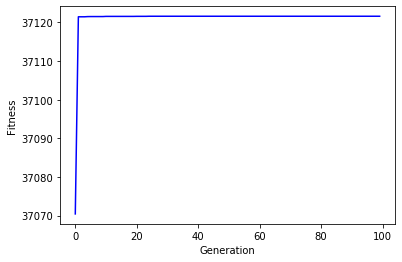

In [16]:
gen = []
fit = []
for generation in range(num_generations):
    # Obtener valores de adaptación de la población
    fitness = cal_pop_fitness(new_population)
    # Selección
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    # Cruza
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0]))

    # Mutación
    offspring_mutation = mutation(offspring_crossover)

    # Crear nueva población basada en los padres y los hijos
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
       

    # Obtener mejor resultado para la generación
    fit.append(numpy.max(cal_pop_fitness(new_population)))
    gen.append(generation)
    

#Obtener la mejor solución
fitness = cal_pop_fitness(new_population)
best_match_idx = numpy.where(fitness == numpy.max(fitness))
print("Mejor resultado : ", new_population[best_match_idx, :])
print("Adaptación del mejor resultado : ", fitness[best_match_idx[0][0]])

#Gráfico
fig, ax = plt.subplots()
ax.plot(gen, fit, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()

Fuente: https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6